 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("C:/Users/jwber/python_homework_2/whale_returns.csv")
# YOUR CODE HERE
# Create whale portfolio dataframe
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
whale_returns = whale_returns.sort_index(ascending=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()

#check nulls exist post drop
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Calc Daily whale returns
whale_daily_returns = whale_returns
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
#remove nulls from daily returns
whale_daily_returns = whale_daily_returns.dropna().copy()
whale_daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("C:/Users/jwber/python_homework_2/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
algo_returns = algo_returns.sort_index(ascending=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
# check to see if there are nulls post drop
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
#Check for duplicates
algo_returns.duplicated()

Date
2014-06-05    False
2014-06-06    False
2014-06-09    False
2014-06-10    False
2014-06-11    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1235, dtype: bool

In [11]:
# describe
algo_returns.describe()



,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [12]:
# Calculate the algo daily returns
algo_daily_returns = algo_returns
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [13]:
# get rid of nulls
algo_daily_returns = algo_daily_returns.dropna().copy()
algo_daily_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("C:/Users/jwber/python_homework_2/sp500_history.csv")
# creating data frame
sp500_returns = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_returns = sp500_returns.sort_index(ascending=True)
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [16]:
#remove dollar sign
sp500_returns["Close"] = sp500_returns["Close"].str.strip("$")
sp500_returns.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [17]:
#update datatypes
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
#Confrim Data type
sp500_returns.dtypes

Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [19]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [20]:
# Rename Column
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close": "S&P 500"})
sp500_daily_returns.head()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Concatenate all DataFrames into a single DataFrame
joined_daily_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis="columns", join="inner")
joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

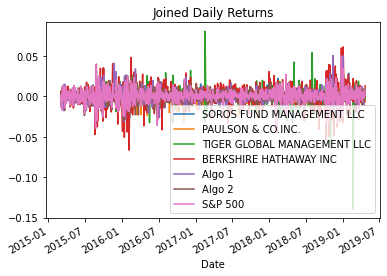

In [22]:
# Plot daily returns
joined_daily_returns.plot(title="Joined Daily Returns")

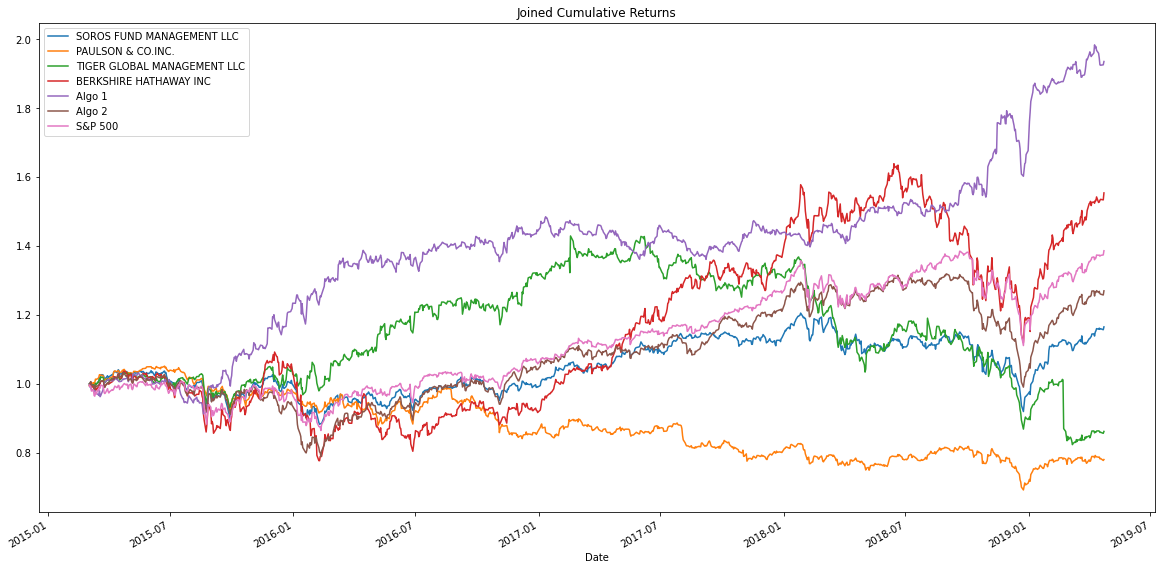

In [23]:
# Plot cumulative returns
joined_cumulative_returns = (1 + joined_daily_returns).cumprod()
joined_cumulative_returns.plot(title="Joined Cumulative Returns", figsize=(20, 10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

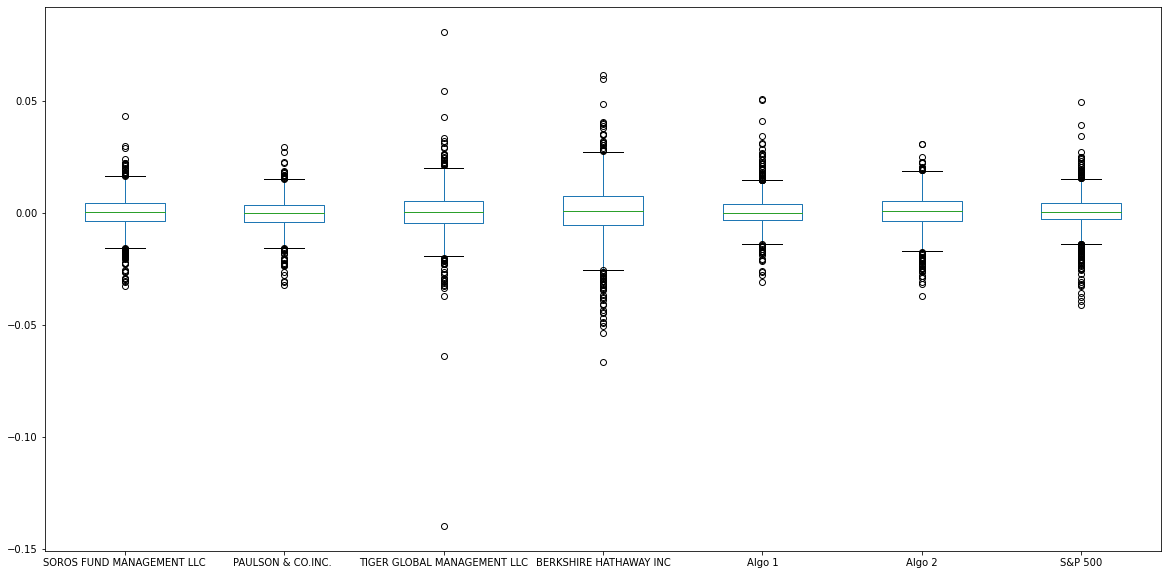

In [24]:
# Box plot to visually show risk
joined_daily_returns.plot.box(figsize=(20, 10))



In [25]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
joined_std = joined_daily_returns.std()
joined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [26]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = joined_daily_returns["S&P 500"].std()

joined_daily_returns.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_daily_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

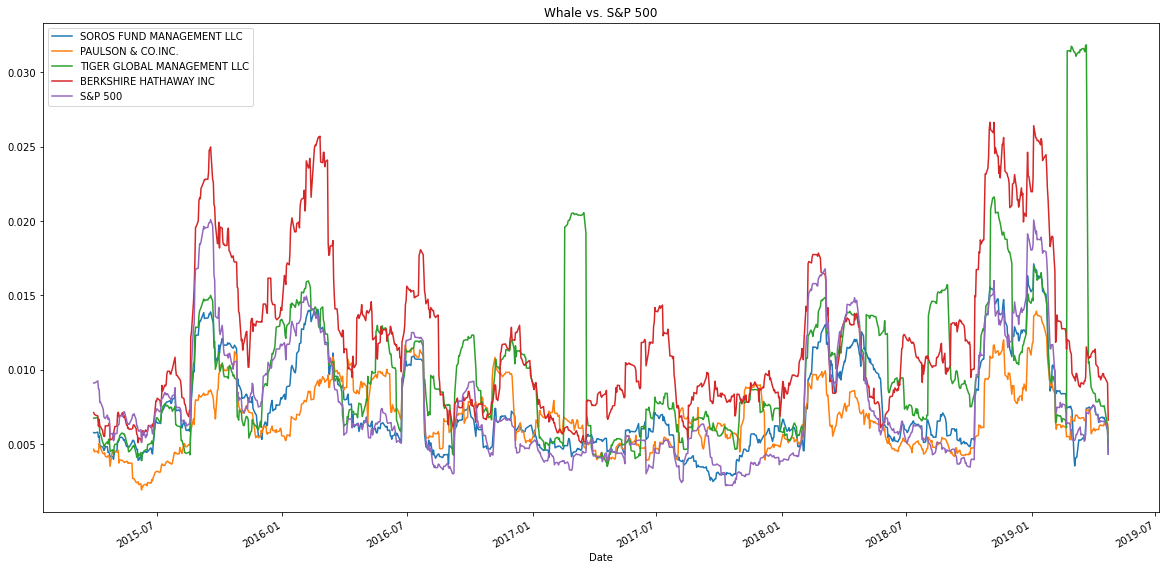

In [28]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
whale_vs_sp500 = pd.concat([whale_daily_returns, sp500_daily_returns], axis="columns", join="inner")
whale_vs_sp500.rolling(window=21).std().plot(figsize=(20, 10), title="Whale vs. S&P 500")

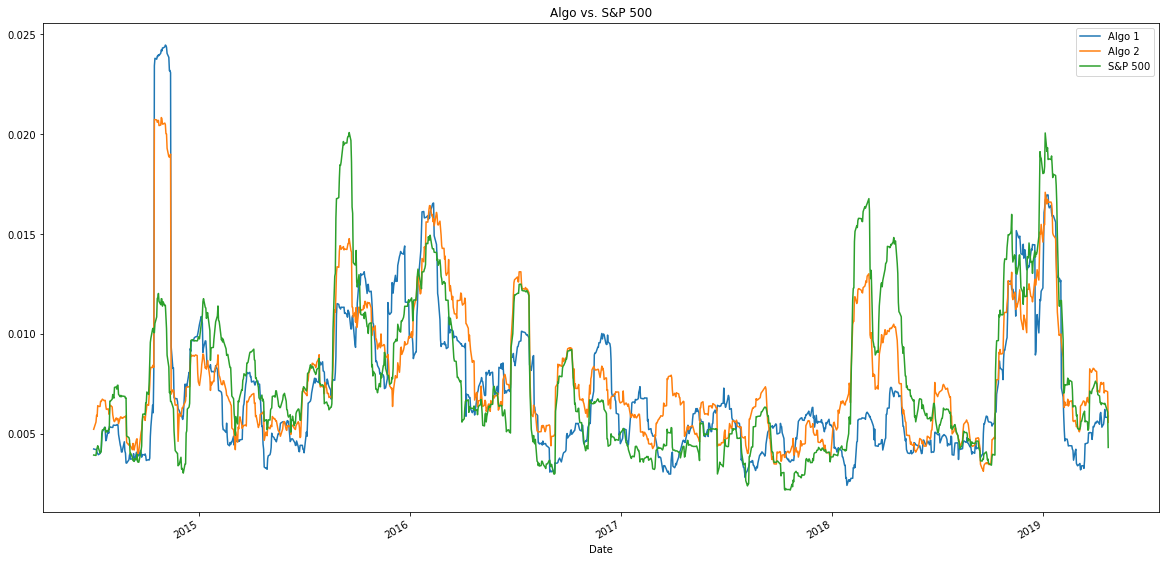

In [29]:
#calc & plot 21 rolling std for algo
algo_vs_sp500 = pd.concat([algo_daily_returns, sp500_daily_returns], axis="columns", join="inner")
algo_vs_sp500.rolling(window=21).std().plot(figsize=(20, 10), title="Algo vs. S&P 500")


In [30]:
# Construct a correlation table whale vs sp500
whale_vs_sp500_corr = whale_vs_sp500.corr(method="pearson")
whale_vs_sp500_corr


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371
S&P 500,0.837864,0.669732,0.623946,0.751371,1.000000


In [31]:
# Construct a correlation table algo vs sp500
algo_vs_sp500_corr = algo_vs_sp500.corr(method="pearson")
algo_vs_sp500_corr

,Algo 1,Algo 2,S&P 500
Algo 1,1.000000,0.346546,0.264393
Algo 2,0.346546,1.000000,0.821981
S&P 500,0.264393,0.821981,1.000000


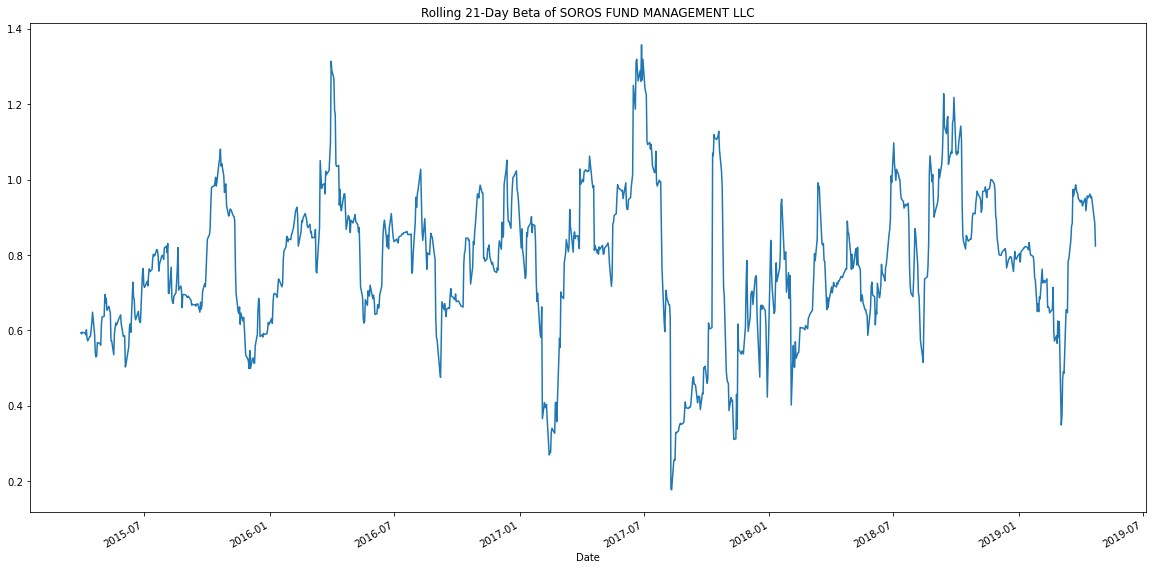

In [32]:
# Calculate rolling Beta for a single portfolio compared to the total market (S&P 500)
#calc rolling covariance
covariance_soros = whale_vs_sp500['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(whale_vs_sp500['S&P 500'])
#calc rolling variance
variance_sp500 = whale_vs_sp500['S&P 500'].rolling(window=21).var()
#calc rolling beta
beta_soros = covariance_soros / variance_sp500
#plot the rolling beta
beta_soros.plot(figsize=(20, 10), title='Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC')

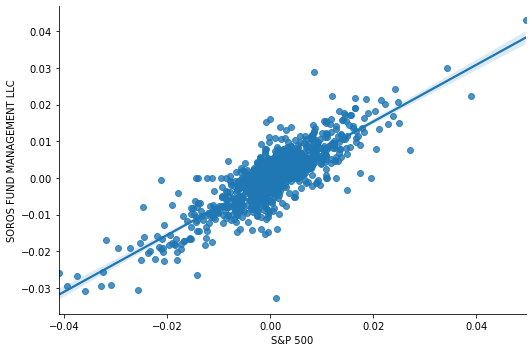

In [33]:
#plot Beta vs Correlation for Soros
import seaborn as sns
sns.lmplot(x="S&P 500", y="SOROS FUND MANAGEMENT LLC", data=whale_vs_sp500, aspect=1.5, fit_reg=True)

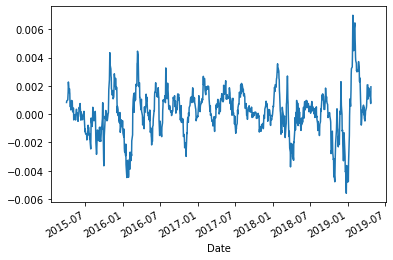

In [34]:
# Calculate a rolling window using the exponentially weighted moving average. 
whale_vs_sp500['SOROS FUND MANAGEMENT LLC'].rolling(window=21).mean().plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [35]:
# Calculate annualized Sharpe Ratios
joined_sharp = (joined_daily_returns.mean() *252) / (joined_daily_returns.std() * np.sqrt(252))
joined_sharp

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

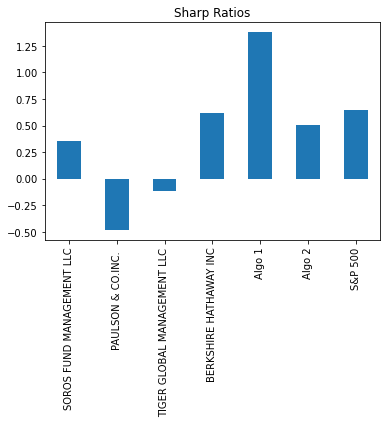

In [36]:
# Visualize the sharpe ratios as a bar plot
joined_sharp.plot(kind="bar", title="Sharp Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Read the first stock
xlk_csv = Path("C:/Users/jwber/python_homework_2/xlk.csv")
xlk_cob_price = pd.read_csv(xlk_csv, index_col='Date', parse_dates=True)
xlk_cob_price = xlk_cob_price.sort_index(ascending=True)
xlk_cob_price.head()

,XLK
Date,
2014-01-02,35.39
2014-01-03,35.22
2014-01-06,35.16
2014-01-07,35.48
2014-01-08,35.48


In [38]:
# Read the second stock
xbi_csv = Path("C:/Users/jwber/python_homework_2/xbi.csv")
xbi_cob_price = pd.read_csv(xbi_csv, index_col='Date', parse_dates=True)
xbi_cob_price = xbi_cob_price.sort_index(ascending=True)
xbi_cob_price.head()

,XBI
Date,
2014-01-02,14.54
2014-01-03,14.49
2014-01-06,14.32
2014-01-07,14.67
2014-01-08,15.05


In [39]:
# Read the third stock
pzd_csv = Path("C:/Users/jwber/python_homework_2/pzd.csv")
pzd_cob_price = pd.read_csv(pzd_csv, index_col='Date', parse_dates=True)
pzd_cob_price = pzd_cob_price.sort_index(ascending=True)
pzd_cob_price.head()

,PZD
Date,
2014-01-02,31.39
2014-01-03,31.54
2014-01-06,31.49
2014-01-07,31.75
2014-01-08,31.65


In [40]:
# Concatenate all stocks into a single DataFrame
custom_portfolio = pd.concat([xlk_cob_price, xbi_cob_price, pzd_cob_price], axis='columns', join='inner')
custom_portfolio.head()

,XLK,XBI,PZD
Date,,,
2014-01-02,35.39,14.54,31.39
2014-01-03,35.22,14.49,31.54
2014-01-06,35.16,14.32,31.49
2014-01-07,35.48,14.67,31.75
2014-01-08,35.48,15.05,31.65


In [41]:
# calc returns for custom portfolio
custom_returns = custom_portfolio.pct_change()
custom_returns.head()

,XLK,XBI,PZD
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.004804,-0.003439,0.004779
2014-01-06,-0.001704,-0.011732,-0.001585
2014-01-07,0.009101,0.024441,0.008257
2014-01-08,0.000000,0.025903,-0.003150


In [42]:
# check nulls
custom_returns.isnull().sum()

XLK    1
XBI    1
PZD    1
dtype: int64

In [43]:
#drop nulls
custom_returns = custom_returns.dropna().copy()
# check for nulls
custom_returns.isnull().sum()

XLK    0
XBI    0
PZD    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_custom_returns = custom_returns.dot(weights)
weighted_custom_returns.head()

Date
2014-01-03   -0.001155
2014-01-06   -0.005007
2014-01-07    0.013933
2014-01-08    0.007585
2014-01-09    0.024131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_returns = pd.concat([joined_daily_returns, weighted_custom_returns], axis='columns', join='inner')
columns = ["Soros Fund Management LLC", "Paulson & CO.INC", "Tiger Global Management LLC", "Berkshire Hathaway INC", "Algo 1", "Algo 2", "S&P 500", "Custom"]
combined_returns.columns = columns
combined_returns.head()

,Soros Fund Management LLC,Paulson & CO.INC,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.004308
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.003083
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.010190
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.012706
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.001749


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.isnull().sum()

Soros Fund Management LLC      0
Paulson & CO.INC               0
Tiger Global Management LLC    0
Berkshire Hathaway INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

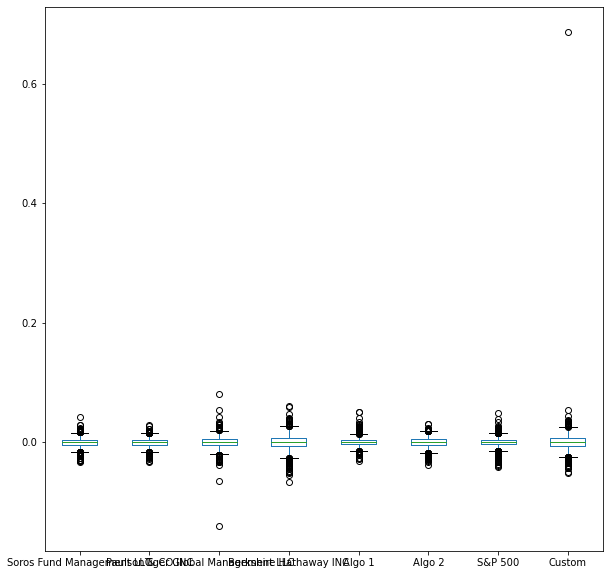

In [47]:
# plot
combined_returns.plot.box(figsize=(10, 10))

In [48]:
#calc cobined standard deviation
combined_std = combined_returns.std()
combined_std

Soros Fund Management LLC      0.007901
Paulson & CO.INC               0.007028
Tiger Global Management LLC    0.010901
Berkshire Hathaway INC         0.012929
Algo 1                         0.007626
Algo 2                         0.008347
S&P 500                        0.008556
Custom                         0.024416
dtype: float64

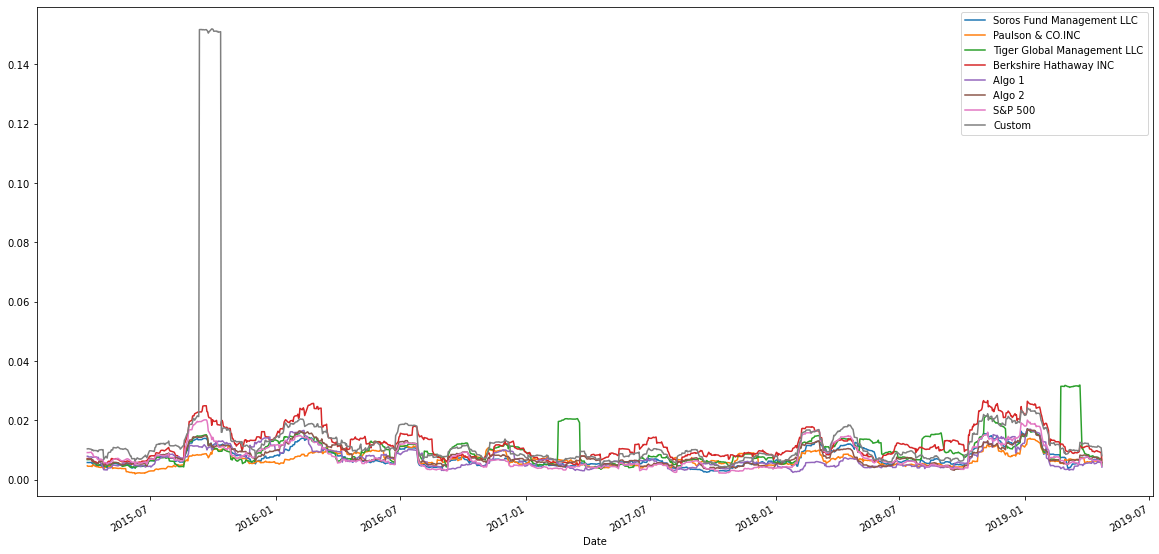

In [49]:
# Rolling
combined_returns.rolling(window=21).std().plot(figsize=(20, 10))

In [50]:
# Annualized Sharpe Ratios
combined_sharpe = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe

Soros Fund Management LLC      0.341321
Paulson & CO.INC              -0.500454
Tiger Global Management LLC   -0.133236
Berkshire Hathaway INC         0.609474
Algo 1                         1.389578
Algo 2                         0.482419
S&P 500                        0.636230
Custom                         0.735668
dtype: float64

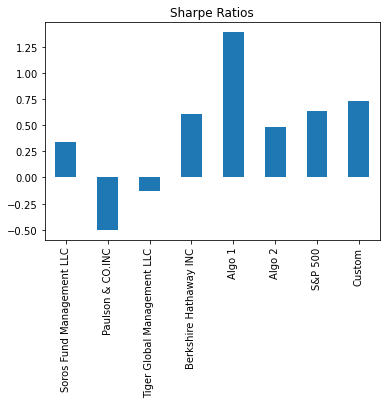

In [51]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot(kind="bar", title="Sharpe Ratios")

In [52]:
# Create a correlation analysis
combined_correlation = combined_returns.corr(method="pearson")
combined_correlation

,Soros Fund Management LLC,Paulson & CO.INC,Tiger Global Management LLC,Berkshire Hathaway INC,Algo 1,Algo 2,S&P 500,Custom
Soros Fund Management LLC,1.000000,0.699780,0.561171,0.754293,0.321731,0.826824,0.838267,0.399939
Paulson & CO.INC,0.699780,1.000000,0.434203,0.545525,0.269336,0.677923,0.669758,0.352042
Tiger Global Management LLC,0.561171,0.434203,1.000000,0.424443,0.164585,0.507148,0.623712,0.246365
Berkshire Hathaway INC,0.754293,0.545525,0.424443,1.000000,0.292528,0.688084,0.751947,0.377681
Algo 1,0.321731,0.269336,0.164585,0.292528,1.000000,0.288782,0.279663,0.170159
Algo 2,0.826824,0.677923,0.507148,0.688084,0.288782,1.000000,0.858935,0.425165
S&P 500,0.838267,0.669758,0.623712,0.751947,0.279663,0.858935,1.000000,0.437352
Custom,0.399939,0.352042,0.246365,0.377681,0.170159,0.425165,0.437352,1.000000


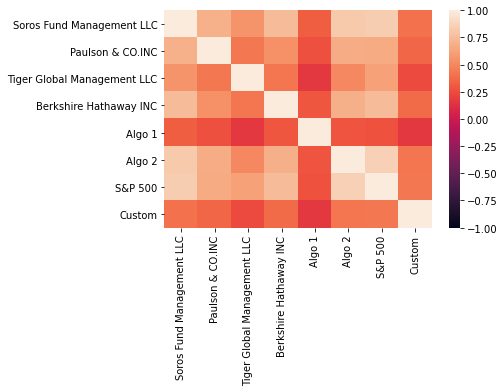

In [53]:
#show correlation as heatmap
sns.heatmap(combined_correlation,vmin=-1, vmax=1)

In [54]:
# Beta
# calculate covariance
covariance = combined_returns['Custom'].cov(combined_returns['S&P 500'])
covariance

9.136633275485157e-05

In [55]:
# calc Variance for s&p 500
variance = combined_returns["S&P 500"].var()
variance

7.321108702623916e-05

In [56]:
#calc the beta
custom_beta = round(covariance / variance, 2)
custom_beta

1.25

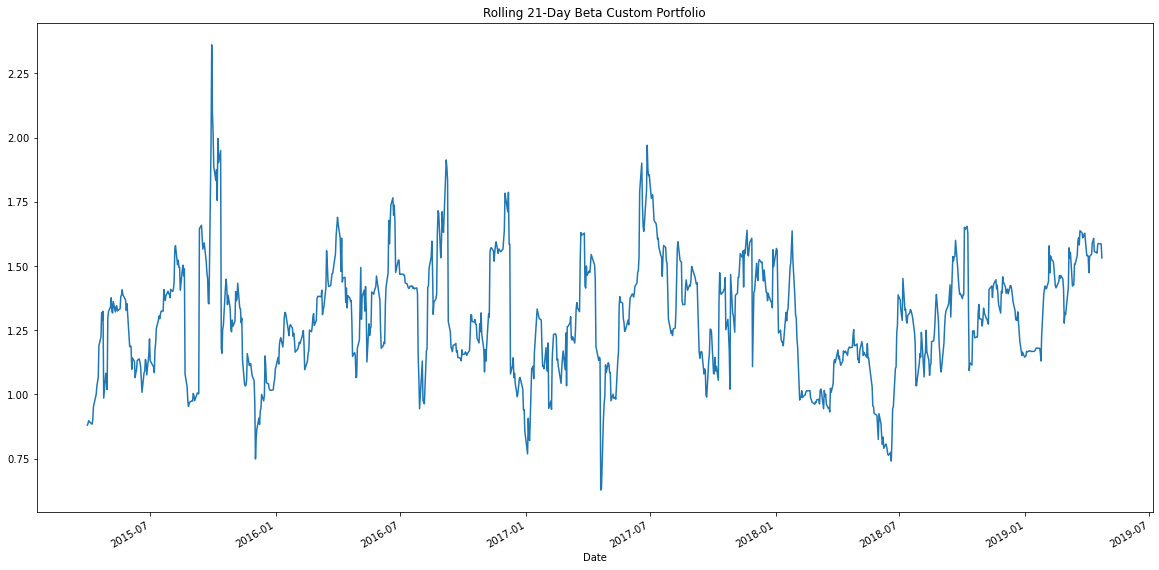

In [57]:
# Calc rolling 21 day beta
rolling_covariance = combined_returns['Custom'].rolling(window=21).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns["S&P 500"].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta Custom Portfolio')

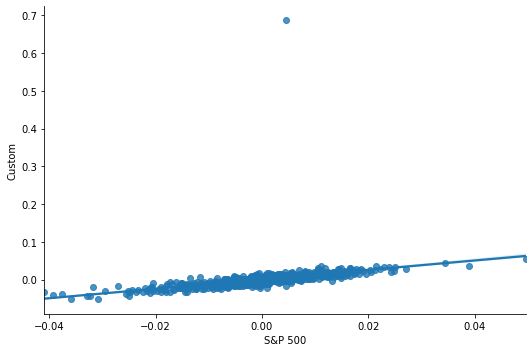

In [58]:
#plot Beta vs Correlation for Soros
import seaborn as sns
sns.lmplot(x="S&P 500", y="Custom", data=combined_returns, aspect=1.5, fit_reg=True)